## Initial Setup

In [1]:
from syft.grid.client.client import connect  # Method used to connect with the domain.
from syft.grid.client.grid_connection import (
    GridHTTPConnection,
)  # Protocol used to talk with the domain

import syft as sy
import torch as th

# Set logging level
import logging

logging.basicConfig(level=logging.INFO)

### Create User Account

In [2]:
unauthenticated_client = connect(
    url="http://localhost:5000", conn_type=GridHTTPConnection
)

unauthenticated_client.users.create(
    email="scientist@researchorg.edu", password="pwd123"
)

[2021-05-09T22:15:42.436147+0100][CRITICAL][logger]][8031] Skipping torchvision.torchvision.transforms.functional.adjust_sharpness not supported in 0.8.1
[2021-05-09T22:15:42.437017+0100][CRITICAL][logger]][8031] Skipping torchvision.torchvision.transforms.functional.autocontrast not supported in 0.8.1
[2021-05-09T22:15:42.437591+0100][CRITICAL][logger]][8031] Skipping torchvision.torchvision.transforms.functional.equalize not supported in 0.8.1
[2021-05-09T22:15:42.438334+0100][CRITICAL][logger]][8031] Skipping torchvision.torchvision.transforms.functional.invert not supported in 0.8.1
[2021-05-09T22:15:42.438826+0100][CRITICAL][logger]][8031] Skipping torchvision.torchvision.transforms.functional.posterize not supported in 0.8.1
[2021-05-09T22:15:42.439454+0100][CRITICAL][logger]][8031] Skipping torchvision.torchvision.transforms.functional.solarize not supported in 0.8.1
INFO:root:User created successfully!


### Log in as Data Scientist

In [3]:
domain_client = connect(
    url="http://localhost:5000",
    credentials={"email": "scientist@researchorg.edu", "password": "pwd123"},
    conn_type=GridHTTPConnection,
)

[2021-05-09T22:15:48.231265+0100][CRITICAL][logger]][8031] Skipping torchvision.torchvision.transforms.functional.adjust_sharpness not supported in 0.8.1
[2021-05-09T22:15:48.232041+0100][CRITICAL][logger]][8031] Skipping torchvision.torchvision.transforms.functional.autocontrast not supported in 0.8.1
[2021-05-09T22:15:48.232598+0100][CRITICAL][logger]][8031] Skipping torchvision.torchvision.transforms.functional.equalize not supported in 0.8.1
[2021-05-09T22:15:48.233384+0100][CRITICAL][logger]][8031] Skipping torchvision.torchvision.transforms.functional.invert not supported in 0.8.1
[2021-05-09T22:15:48.233923+0100][CRITICAL][logger]][8031] Skipping torchvision.torchvision.transforms.functional.posterize not supported in 0.8.1
[2021-05-09T22:15:48.234591+0100][CRITICAL][logger]][8031] Skipping torchvision.torchvision.transforms.functional.solarize not supported in 0.8.1


### Find a Dataset

In [4]:
domain_client.datasets.all(pandas=True)

,id,manifest,description,tags,data
0,ed3d0a9d-abfb-458c-9b2c-06a739802f4b,This dataset is originally from the National I...,This dataset is originally from the National I...,"[#diabetes, #pima-indians-database]","[{'name': 'diabetes-data/data_02.csv', 'id': '..."


In [9]:
remote_dataset = domain_client.datasets["ed3d0a9d-abfb-458c-9b2c-06a739802f4b"]

In [10]:
print(remote_dataset.manifest)

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Diabetes files consist of 8 fields per record.  Each field is
separated by a comma and each record is separated by a newline.

CSV Columns and format:
(1) Pregnancies (Integer) : Number of times pregnant
(2) Glucose (Integer) : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
(3) Blood Pressure (Integer) : Diastolic blood pressure (mm Hg)
(4) Skin Thickness (Integer) : Triceps skin fold thickness (mm)
(5) Insulin (Integer) : 2-Hour serum insulin (mu U/ml)
(6) BMI (Float) : Body mass index (weight in kg/(height in m)^2)
(6) Diabetes Pedigree (Float) : Diabetes Pedigree Function
(7) Age (In

In [11]:
remote_dataset.pandas

,name,id,dtype,shape
0,diabetes-data/data_02.csv,4f39bce9-1367-45a3-8556-75c890406272,Tensor,"(200, 9)"
1,diabetes-data/data_06.csv,f0b83c5b-b852-46d2-a635-13f589cd7d36,Tensor,"(200, 9)"
2,diabetes-data/data_10.csv,7044efc5-13b3-4056-bed4-889db77aa657,Tensor,"(200, 9)"
3,diabetes-data/data_03.csv,146cb0cf-3ed0-4183-9904-821d699f81bf,Tensor,"(200, 9)"
4,diabetes-data/data_04.csv,0f63f03d-8e25-4d6b-ad74-135739a8bdc5,Tensor,"(200, 9)"
5,diabetes-data/new_data.csv,57a8837f-17a5-4dae-bc6e-f676ff920206,Tensor,"(2000, 9)"
6,diabetes-data/data_07.csv,7786dbe2-f8b1-4ffe-b0b7-5b27a863c7dc,Tensor,"(200, 9)"
7,diabetes-data/data_08.csv,dec2d96d-5563-45ce-bb85-ac91489590c0,Tensor,"(200, 9)"
8,diabetes-data/data_09.csv,01214b56-e930-456b-be45-36fd4d3a94cf,Tensor,"(200, 9)"
9,diabetes-data/data_05.csv,cbb6e279-dad1-460d-8557-50d942d7654f,Tensor,"(200, 9)"


### Load Pre-trained Model

epoch 0	loss : 0.6870039701461792	 accuracy : 0.644
epoch 50	loss : 0.5043874382972717	 accuracy : 0.7735
epoch 100	loss : 0.49245786666870117	 accuracy : 0.793
epoch 150	loss : 0.4793068468570709	 accuracy : 0.799
epoch 200	loss : 0.4688788056373596	 accuracy : 0.8105
epoch 250	loss : 0.45552244782447815	 accuracy : 0.8125


INFO:matplotlib.font_manager:Could not open font file /System/Library/Fonts/Supplemental/NISC18030.ttf: In FT2Font: Could not set the fontsize
INFO:matplotlib.font_manager:Could not open font file /System/Library/Fonts/Apple Color Emoji.ttc: In FT2Font: Could not set the fontsize
INFO:matplotlib.font_manager:generated new fontManager


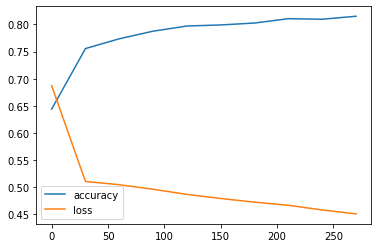

In [12]:
import torch as th
from diabetes_model_training import train_diabetes_model, plot_training_acc

model, loss, acc, epochs_list = train_diabetes_model(th)
plot_training_acc(acc, loss, epochs_list)

### Create a Worker

In [13]:
domain_client.workers.instance_type(pandas=True)

RequestAPIException: Something went wrong during this request: Provider not supported

In [ ]:
domain_client.workers.create(instance_type="Standard_B2s")

In [14]:
domain_client.workers.all(pandas=True)

RequestAPIException: Something went wrong during this request: list index out of range

In [ ]:
worker = domain_client.workers[1]

### Send the Model to the Worker

In [ ]:
remote_model = model.send(worker)

### Load the Dataset into the Worker

In [ ]:
domain_client.load(remote_dataset.files[0].pointer, worker.address)

In [ ]:
worker.store.pandas

### Perform remote inference

In [ ]:
feature = worker.store[0][0:, 0:8]
labels = worker.store[0][0:, 8]

predicted = remote_model(feature)

### Add DP noise to the evaluation result

In [ ]:
acc = (predicted.reshape(-1).round() == labels).int().tolist()

In [ ]:
import pydp

sy.load("pydp")

In [ ]:
BoundedMean = worker.pydp.algorithms.laplacian.BoundedMean
mean_ptr = BoundedMean(0.8, lower_bound=0.01, upper_bound=1.0, dtype="float")

acc_result = mean_ptr.quick_result(acc)

### Save the result to the Domain

In [ ]:
worker.save(acc_result)

### Request to download the result

In [ ]:
domain_client.store.pandas

In [ ]:
acc_ptr = domain_client.store[""]

In [ ]:
acc_ptr.request(reason="I'd like to have access to my accuracy result!")

### Download the result

In [ ]:
acc_ptr.get()